In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy.stats import t

import seaborn as sns
from sklearn import tree
from sklearn import datasets
from sklearn.datasets import make_moons ## sklearn functions for synthetic data
from sklearn.datasets import make_circles
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA  ## sklearn PCA classes
from sklearn.decomposition import KernelPCA
from sklearn import linear_model    ## sklearn linear model
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier ## sklearn decision trees
from sklearn.ensemble import RandomForestClassifier ## sklearn random forests
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from IPython.display import Image
import pydotplus
pd.reset_option('all')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
import dask.dataframe as dd
from dask.diagnostics import ProgressBar

In [3]:
# read Fire_Incident_Dispatch_Data_With_Loc.csv
Dispatch = pd.read_csv('Fire_Incident_Dispatch_Data_Pop_Weather.csv')

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
Dispatch.head()

,Unnamed: 0,STARFIRE_INCIDENT_ID,INCIDENT_DATETIME,ALARM_BOX_BOROUGH,ALARM_BOX_NUMBER,ALARM_BOX_LOCATION,INCIDENT_BOROUGH,ZIPCODE,POLICEPRECINCT,CITYCOUNCILDISTRICT,COMMUNITYDISTRICT,COMMUNITYSCHOOLDISTRICT,CONGRESSIONALDISTRICT,ALARM_SOURCE_DESCRIPTION_TX,ALARM_LEVEL_INDEX_DESCRIPTION,HIGHEST_ALARM_LEVEL,INCIDENT_CLASSIFICATION,INCIDENT_CLASSIFICATION_GROUP,DISPATCH_RESPONSE_SECONDS_QY,FIRST_ASSIGNMENT_DATETIME,FIRST_ACTIVATION_DATETIME,FIRST_ON_SCENE_DATETIME,INCIDENT_CLOSE_DATETIME,VALID_DISPATCH_RSPNS_TIME_INDC,VALID_INCIDENT_RSPNS_TIME_INDC,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,ENGINES_ASSIGNED_QUANTITY,LADDERS_ASSIGNED_QUANTITY,OTHER_UNITS_ASSIGNED_QUANTITY,LATITUDE,LONGITUDE,POP100,MaxTemperature,MinTemperature,AvgTemperature,Precipitation
0,0,2100404460110002,2021-01-04 00:01:00,MANHATTAN,M0446,3 AVE & ST. MARKS PL,MANHATTAN,10003.0,9.0,2.0,103.0,1.0,12.0,PD Link/Medical,Initial Alarm,First Alarm,Medical - PD Link 10-91,Medical Emergencies,13.0,01/04/2021 12:01:00 AM,01/04/2021 12:02:00 AM,NaN,01/04/2021 12:07:00 AM,N,N,0.0,0.0,1.0,0.0,0.0,40.729553,-73.9899,215.929626,43,35,39.0,0.02
1,1,2100904460110861,2021-01-09 16:27:00,MANHATTAN,M0446,3 AVE & ST. MARKS PL,MANHATTAN,10003.0,9.0,2.0,103.0,1.0,12.0,Phone,Initial Alarm,First Alarm,Utility Emergency - Water,NonMedical Emergencies,58.0,01/09/2021 04:28:00 PM,01/09/2021 04:28:00 PM,01/09/2021 04:32:00 PM,01/09/2021 04:40:00 PM,N,Y,314.0,256.0,1.0,1.0,0.0,40.729553,-73.9899,215.929626,37,24,30.5,0
2,2,2101004460110579,2021-01-10 18:28:00,MANHATTAN,M0446,3 AVE & ST. MARKS PL,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,Phone,Initial Alarm,First Alarm,Odor - Other Than Smoke,NonMedical Emergencies,67.0,01/10/2021 06:29:00 PM,01/10/2021 06:29:00 PM,01/10/2021 06:33:00 PM,01/10/2021 06:49:00 PM,N,Y,314.0,247.0,2.0,2.0,1.0,40.729553,-73.9899,215.929626,41,29,35.0,0
3,3,2101404460110072,2021-01-14 01:16:00,MANHATTAN,M0446,3 AVE & ST. MARKS PL,MANHATTAN,10003.0,9.0,2.0,103.0,1.0,12.0,EMS Link/Medical,Initial Alarm,First Alarm,Medical - No PT Contact EMS is Onscene,Medical Emergencies,7.0,01/14/2021 01:16:00 AM,01/14/2021 01:16:00 AM,01/14/2021 01:21:00 AM,01/14/2021 01:28:00 AM,N,Y,314.0,307.0,1.0,0.0,0.0,40.729553,-73.9899,215.929626,49,39,44.0,0
4,4,2101504460210489,2021-01-15 10:54:00,MANHATTAN,M0446,3 AVE & ST. MARKS PL,MANHATTAN,10003.0,9.0,2.0,103.0,1.0,12.0,Private Fire Alarm,Initial Alarm,First Alarm,Carbon Monoxide - Code 1 - Investigation,NonMedical Emergencies,54.0,01/15/2021 10:55:00 AM,01/15/2021 10:55:00 AM,01/15/2021 10:59:00 AM,01/15/2021 11:05:00 AM,N,Y,293.0,239.0,1.0,1.0,0.0,40.729553,-73.9899,215.929626,46,38,42.0,0.38


In [6]:
Dispatch['INCIDENT_DATETIME'] = pd.to_datetime(Dispatch['INCIDENT_DATETIME'])

In [7]:
#check time range
print(Dispatch['INCIDENT_DATETIME'].min())
print(Dispatch['INCIDENT_DATETIME'].max())

2020-01-01 00:00:31
2023-12-31 23:59:11


In [8]:
Dispatch.shape

(1616061, 37)

In [9]:
# use # INCIDENT_DATETIME	The date and time of the incident.
# ALARM_BOX_BOROUGH	The borough of the alarm box.
# ALARM_BOX_LOCATION	The location of the alarm box.
# ALARM_BOX	The alarm box number.
# INCIDENT_BOROUGH	The borough of the incident.
# ZIPCODE	The zip code of the incident.
# POLICEPRECINCT	The police precinct of the incident.
# CITYCOUNCILDISTRICT	The city council district.
# COMMUNITYDISTRICT	The community district.
# COMMUNITYSCHOOLDISTRICT	The community school district.
# CONGRESSIONALDISTRICT	The congressional district.
# ALARM_SOURCE_DESCRIPTION_TX	The description of the alarm source.
# ALARM_LEVEL_INDEX_DESCRIPTION	The alarm level index.
# HIGHEST_ALARM_LEVEL	The highest alarm level.
# INCIDENT_CLASSIFICATION	The incident classification.
# INCIDENT_CLASSIFICATION_GROUP	The incident classification roll up group.
# DISPATCH_RESPONSE_SECONDS_QY	The elapsed time in seconds between the incident_datetime and the first_assignment_datetime.
# FIRST_ASSIGNMENT_DATETIME	The date and time of the first unit assignment.
# FIRST_ACTIVATION_DATETIME	The date and time of the first unit acknowledgement of the assignment.
# FIRST_ON_SCENE_DATETIME	The date and time of the first unit at the scene of the incident.
# INCIDENT_CLOSE_DATETIME 	The date and time that the incident was closed in the dispatch system.
# VALID_DISPATCH_RSPNS_TIME_INDC	Indicates that the components comprising the generation of the DISPATCH_RESPONSE_SECONDS_QY are valid.
# VALID_INCIDENT_RSPNS_TIME_INDC	Indicates that the components comprising the generation of the INCIDENT_RESPONSE_SECONDS_QY are valid.
# INCIDENT_RESPONSE_SECONDS_QY	The elapsed time in seconds between the incident_datetime and the first_onscene_datetime.
# INCIDENT_TRAVEL_TM_SECONDS_QY 	The elapsed time in seconds between the first_assignment_datetime and the first_onscene_datetime.
# ENGINES_ASSIGNED_QUANTITY	The number of engine units assigned to the incident.
# LADDERS_ASSIGNED_QUANTITY 	The number of ladder units assigned to the incident.
# OTHER_UNITS_ASSIGNED_QUANTITY	The number of  units that are not engines or ladders that were assigned to the incident.


In [10]:
print(Dispatch.ALARM_LEVEL_INDEX_DESCRIPTION.value_counts(ascending=False))
print(Dispatch.HIGHEST_ALARM_LEVEL.value_counts(ascending=False))
print()

print('Number of INCIDENT_CLASSIFICATION:',Dispatch.INCIDENT_CLASSIFICATION.nunique())
print(Dispatch.INCIDENT_CLASSIFICATION_GROUP.value_counts(ascending=False))

ALARM_LEVEL_INDEX_DESCRIPTION
Initial Alarm                                       1264266
DEFAULT RECORD                                       345419
7-5 (All Hands Alarm)                                  5122
10-75 Signal (Request for all hands alarm)              573
Second Alarm                                            353
10-76 & 10-77 Signal (Notification Hi-Rise Fire)        170
Third Alarm                                              96
Fourth Alarm                                             29
Fifth Alarm                                              25
Sixth Alarm                                               4
Seventh Alarm                                             2
Ninth Alarm or Higher                                     1
Eighth Alarm                                              1
Name: count, dtype: int64
HIGHEST_ALARM_LEVEL
First Alarm              1610428
All Hands Working           5123
Second Alarm                 353
Third Alarm                   96
Fourth Alarm

In [11]:
print('Number of CITYCOUNCILDISTRICT:',Dispatch.CITYCOUNCILDISTRICT.nunique())
print('Number of COMMUNITYDISTRICT:',Dispatch.COMMUNITYDISTRICT.nunique())
print('Number of COMMUNITYSCHOOLDISTRICT:',Dispatch.COMMUNITYSCHOOLDISTRICT.nunique())
print('Number of CONGRESSIONALDISTRICT:',Dispatch.CONGRESSIONALDISTRICT.nunique())
print('Number of ALARM_SOURCE_DESCRIPTION_TX:',Dispatch.ALARM_SOURCE_DESCRIPTION_TX.nunique())


Number of CITYCOUNCILDISTRICT: 51
Number of COMMUNITYDISTRICT: 71
Number of COMMUNITYSCHOOLDISTRICT: 32
Number of CONGRESSIONALDISTRICT: 13
Number of ALARM_SOURCE_DESCRIPTION_TX: 19


In [12]:
print('Number of rows that have different ALARM_BOX_BOROUGH and INCIDENT_BOROUGH:',Dispatch[Dispatch['ALARM_BOX_BOROUGH']!=Dispatch['INCIDENT_BOROUGH']].shape[0])
# all rows are the same

Number of rows that have different ALARM_BOX_BOROUGH and INCIDENT_BOROUGH: 0


In [13]:
# see how many FIRST_ON_SCENE_DATETIME are missing
print('Number of rows that FIRST_ON_SCENE_DATETIME are missing:',Dispatch.FIRST_ON_SCENE_DATETIME.isnull().sum())
print('Number of rows that INCIDENT_RESPONSE_SECONDS_QY are missing:',Dispatch.INCIDENT_RESPONSE_SECONDS_QY.isnull().sum())

Number of rows that FIRST_ON_SCENE_DATETIME are missing: 375359
Number of rows that INCIDENT_RESPONSE_SECONDS_QY are missing: 256686


### Filter only INCIDENT_CLASSIFICATION_GROUP == 'Structural Fires' or 'NonStructural Fires'

In [14]:
# filter only INCIDENT_CLASSIFICATION_GROUP = 'Structural Fires' or 'NonStructural Fires'
Dispatch1 = Dispatch[(Dispatch.INCIDENT_CLASSIFICATION_GROUP == 'Structural Fires') | (Dispatch.INCIDENT_CLASSIFICATION_GROUP == 'NonStructural Fires')]

In [15]:
# construct the target variable, ResolutionTime = INCIDENT_CLOSE_DATETIME - INCIDENT_DATETIME
Dispatch1['INCIDENT_CLOSE_DATETIME']=pd.to_datetime(Dispatch1['INCIDENT_CLOSE_DATETIME'])
Dispatch1['INCIDENT_DATETIME'] = pd.to_datetime(Dispatch1['INCIDENT_DATETIME'])
Dispatch1['ResolutionTime'] = Dispatch1['INCIDENT_CLOSE_DATETIME']-Dispatch1['INCIDENT_DATETIME']
Dispatch1['ResolutionTime'] = Dispatch1['ResolutionTime'].dt.total_seconds()

In [16]:
Dispatch1

,Unnamed: 0,STARFIRE_INCIDENT_ID,INCIDENT_DATETIME,ALARM_BOX_BOROUGH,ALARM_BOX_NUMBER,ALARM_BOX_LOCATION,INCIDENT_BOROUGH,ZIPCODE,POLICEPRECINCT,CITYCOUNCILDISTRICT,COMMUNITYDISTRICT,COMMUNITYSCHOOLDISTRICT,CONGRESSIONALDISTRICT,ALARM_SOURCE_DESCRIPTION_TX,ALARM_LEVEL_INDEX_DESCRIPTION,HIGHEST_ALARM_LEVEL,INCIDENT_CLASSIFICATION,INCIDENT_CLASSIFICATION_GROUP,DISPATCH_RESPONSE_SECONDS_QY,FIRST_ASSIGNMENT_DATETIME,FIRST_ACTIVATION_DATETIME,FIRST_ON_SCENE_DATETIME,INCIDENT_CLOSE_DATETIME,VALID_DISPATCH_RSPNS_TIME_INDC,VALID_INCIDENT_RSPNS_TIME_INDC,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,ENGINES_ASSIGNED_QUANTITY,LADDERS_ASSIGNED_QUANTITY,OTHER_UNITS_ASSIGNED_QUANTITY,LATITUDE,LONGITUDE,POP100,MaxTemperature,MinTemperature,AvgTemperature,Precipitation,ResolutionTime
7,7,2103804460110088,2021-02-07 02:36:00,MANHATTAN,M0446,3 AVE & ST. MARKS PL,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,Phone,Initial Alarm,First Alarm,Demolition Debris or Rubbish Fire,NonStructural Fires,75.0,02/07/2021 02:37:00 AM,02/07/2021 02:38:00 AM,02/07/2021 02:42:00 AM,2021-02-07 02:44:00,N,Y,319.0,244.0,1.0,0.0,0.0,40.729553,-73.989900,215.929626,40,24,32.0,0.39,480.0
51,51,2118604460310951,2021-07-05 20:53:00,MANHATTAN,M0446,3 AVE & ST. MARKS PL,MANHATTAN,10003.0,9.0,2.0,103.0,1.0,12.0,Phone,Initial Alarm,First Alarm,Demolition Debris or Rubbish Fire,NonStructural Fires,32.0,07/05/2021 08:54:00 PM,07/05/2021 08:54:00 PM,NaN,2021-07-05 21:06:00,N,N,0.0,0.0,1.0,0.0,0.0,40.729553,-73.989900,215.929626,83,67,75.0,0,780.0
57,57,2021404460110146,2020-08-01 04:22:03,MANHATTAN,M0446,3 AVE & ST. MARKS PL,MANHATTAN,10003.0,9.0,2.0,103.0,1.0,12.0,Phone,Initial Alarm,First Alarm,Automobile Fire,NonStructural Fires,38.0,08/01/2020 04:22:41 AM,08/01/2020 04:23:11 AM,08/01/2020 04:25:48 AM,2020-08-01 05:08:19,N,Y,225.0,187.0,1.0,1.0,0.0,40.729553,-73.989900,215.929626,88,71,79.5,0,2776.0
77,77,2029604460111378,2020-10-22 21:39:39,MANHATTAN,M0446,3 AVE & ST. MARKS PL,MANHATTAN,10003.0,9.0,2.0,103.0,1.0,12.0,Phone,Initial Alarm,First Alarm,Other Commercial Building Fire,Structural Fires,24.0,10/22/2020 09:40:03 PM,10/22/2020 09:40:08 PM,10/22/2020 09:42:32 PM,2020-10-22 21:58:39,N,Y,173.0,149.0,3.0,2.0,1.0,40.729553,-73.989900,215.929626,68,64,66.0,0,1140.0
93,93,2001704460111619,2020-01-17 22:03:45,MANHATTAN,M0446,3 AVE & ST. MARKS PL,MANHATTAN,10003.0,9.0,2.0,103.0,1.0,12.0,Phone,Initial Alarm,First Alarm,Multiple Dwelling 'A' - Food on the stove fire,Structural Fires,37.0,01/17/2020 10:04:22 PM,01/17/2020 10:04:31 PM,01/17/2020 10:05:47 PM,2020-01-17 22:34:53,N,Y,122.0,85.0,4.0,2.0,1.0,40.729553,-73.989900,215.929626,33,21,27.0,0,1868.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615907,1615907,220730-Q4348-003-0613,2022-07-30 23:18:36,QUEENS,Q4348,BOOTH MEMORIAL AVE 200 W OF 153 ST,QUEENS,11355.0,109.0,20.0,407.0,25.0,6.0,PHONE,Initial Alarm,First Alarm,Demolition Debris or Rubbish Fire,NonStructural Fires,32.0,07/30/2022 11:19:09 PM,07/30/2022 11:19:23 PM,07/30/2022 11:24:26 PM,2022-07-30 23:29:45,N,Y,349.0,316.0,1.0,0.0,0.0,40.743107,-73.815676,7.540075,87,73,80.0,T,669.0
1615935,1615935,231020-M1290-001-1187,2023-10-20 19:46:27,MANHATTAN,M1290,FDR DR & E 107 ST,MANHATTAN,10029.0,23.0,8.0,111.0,4.0,13.0,PHONE,Initial Alarm,First Alarm,Automobile Fire,NonStructural Fires,50.0,10/20/2023 07:47:18 PM,10/20/2023 07:47:45 PM,10/20/2023 07:52:44 PM,2023-10-20 20:38:52,N,Y,377.0,326.0,1.0,1.0,0.0,40.789511,-73.937502,0.000000,63,59,61.0,0.84,3145.0
1615985,1615985,230731-R3866-001-0082,2023-07-31 13:26:05,RICHMOND / STATEN ISLAND,R3866,BENNINGTON ST & ROBINSON AVE,RICHMOND / STATEN ISLAND,10312.0,122.0,51.0,503.0,31.0,11.0,PHONE,Initial Alarm,First Alarm,Private Dwelling Fire,Structural Fires,38.0,07/31/2023 01:26:44 PM,07/31/2023 01:26:57 PM,07/31/2023 01:30:22 PM,2023-07-31 14:41:32,N,Y,256.0,218.0,4.0,2.0,1.0,40.541210,-74.155249,33.057411,85,66,75.

In [17]:
print('Number of INCIDENT_CLASSIFICATION after filtering:',Dispatch1.INCIDENT_CLASSIFICATION.nunique())
print(Dispatch1.INCIDENT_CLASSIFICATION.value_counts(ascending=False))

Number of INCIDENT_CLASSIFICATION after filtering: 29
INCIDENT_CLASSIFICATION
Multiple Dwelling 'A' - Food on the stove fire    23353
Demolition Debris or Rubbish Fire                 17676
Private Dwelling Fire                             16574
Multiple Dwelling 'A' - Other fire                10230
Other Commercial Building Fire                     7768
Manhole Fire - Seeping Smoke                       5982
Multiple Dwelling 'B' Fire                         4081
Automobile Fire                                    3732
Manhole Fire - Other                               2631
Brush Fire                                         2152
School Fire                                        1163
Multiple Dwelling 'A' - Compactor fire              874
Hospital Fire                                       674
Store Fire                                          626
Other Transportation Fire                           488
Manhole Fire - Blown Cover                          437
Church Fire               

In [18]:
# check value counts of VALID_DISPATCH_RSPNS_TIME_INDC and VALID_INCIDENT_RSPNS_TIME_INDC
print(Dispatch1.VALID_DISPATCH_RSPNS_TIME_INDC.value_counts(ascending=False))
print(Dispatch1.VALID_INCIDENT_RSPNS_TIME_INDC.value_counts(ascending=False))

VALID_DISPATCH_RSPNS_TIME_INDC
N    99650
Name: count, dtype: int64
VALID_INCIDENT_RSPNS_TIME_INDC
Y    93942
N     5708
Name: count, dtype: int64


In [19]:
# drop the unuseful columns, split the INCIDENT_DATETIME and add weekday
Dispatch2 = Dispatch1.drop(['Unnamed: 0','STARFIRE_INCIDENT_ID','ALARM_BOX_NUMBER','ALARM_BOX_BOROUGH','ALARM_BOX_LOCATION',
                            'POLICEPRECINCT','CITYCOUNCILDISTRICT','COMMUNITYDISTRICT','COMMUNITYSCHOOLDISTRICT',
                            'ALARM_LEVEL_INDEX_DESCRIPTION',
                            #'INCIDENT_CLASSIFICATION',
                            'FIRST_ON_SCENE_DATETIME','FIRST_ASSIGNMENT_DATETIME','FIRST_ACTIVATION_DATETIME','INCIDENT_CLOSE_DATETIME','VALID_DISPATCH_RSPNS_TIME_INDC','VALID_INCIDENT_RSPNS_TIME_INDC',
                            # 'LATITUDE','LONGITUDE'
                            ],axis=1)

In [20]:
print(Dispatch2.ALARM_SOURCE_DESCRIPTION_TX.value_counts(ascending=False))
print(Dispatch2.INCIDENT_CLASSIFICATION.value_counts(ascending=False))

ALARM_SOURCE_DESCRIPTION_TX
PHONE                 41084
Phone                 29512
CLASS-3               16211
Private Fire Alarm    11006
VERBAL                  732
Verbal                  538
911                     208
ERS                     201
PD Link/Medical          31
EMS-911                  30
EMS                      25
ERS No Contact           23
EMS Link/Medical         16
BARS                     12
911 Text                 11
911TEXT                   6
SOL                       4
Name: count, dtype: int64
INCIDENT_CLASSIFICATION
Multiple Dwelling 'A' - Food on the stove fire    23353
Demolition Debris or Rubbish Fire                 17676
Private Dwelling Fire                             16574
Multiple Dwelling 'A' - Other fire                10230
Other Commercial Building Fire                     7768
Manhole Fire - Seeping Smoke                       5982
Multiple Dwelling 'B' Fire                         4081
Automobile Fire                                    373

In [21]:
# in ALARM_SOURCE_DESCRIPTION_TX, replace 'Phone' with 'PHONE', 'Verbal' with 'VERBAL', '911TEXT' with '911 Text', since they are the same
Dispatch2['ALARM_SOURCE_DESCRIPTION_TX'] = Dispatch2['ALARM_SOURCE_DESCRIPTION_TX'].replace('Phone','PHONE')
Dispatch2['ALARM_SOURCE_DESCRIPTION_TX'] = Dispatch2['ALARM_SOURCE_DESCRIPTION_TX'].replace('Verbal','VERBAL')
Dispatch2['ALARM_SOURCE_DESCRIPTION_TX'] = Dispatch2['ALARM_SOURCE_DESCRIPTION_TX'].replace('911TEXT','911 Text')

In [22]:
Dispatch2['weekday'] = Dispatch2['INCIDENT_DATETIME'].dt.weekday
Dispatch2['hour'] = Dispatch2['INCIDENT_DATETIME'].dt.hour
Dispatch2['minute'] = Dispatch2['INCIDENT_DATETIME'].dt.minute
# Dispatch2['date'] = Dispatch2['INCIDENT_DATETIME'].dt.date
# Dispatch2['date'] = pd.to_datetime(Dispatch2['date'])


In [23]:
# check time range
print(Dispatch2.INCIDENT_DATETIME.min())
print(Dispatch2.INCIDENT_DATETIME.max())

2020-01-01 00:12:51
2023-12-31 23:46:03


In [24]:
Dispatch2

,INCIDENT_DATETIME,INCIDENT_BOROUGH,ZIPCODE,CONGRESSIONALDISTRICT,ALARM_SOURCE_DESCRIPTION_TX,HIGHEST_ALARM_LEVEL,INCIDENT_CLASSIFICATION,INCIDENT_CLASSIFICATION_GROUP,DISPATCH_RESPONSE_SECONDS_QY,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,ENGINES_ASSIGNED_QUANTITY,LADDERS_ASSIGNED_QUANTITY,OTHER_UNITS_ASSIGNED_QUANTITY,LATITUDE,LONGITUDE,POP100,MaxTemperature,MinTemperature,AvgTemperature,Precipitation,ResolutionTime,weekday,hour,minute
7,2021-02-07 02:36:00,MANHATTAN,NaN,NaN,PHONE,First Alarm,Demolition Debris or Rubbish Fire,NonStructural Fires,75.0,319.0,244.0,1.0,0.0,0.0,40.729553,-73.989900,215.929626,40,24,32.0,0.39,480.0,6,2,36
51,2021-07-05 20:53:00,MANHATTAN,10003.0,12.0,PHONE,First Alarm,Demolition Debris or Rubbish Fire,NonStructural Fires,32.0,0.0,0.0,1.0,0.0,0.0,40.729553,-73.989900,215.929626,83,67,75.0,0,780.0,0,20,53
57,2020-08-01 04:22:03,MANHATTAN,10003.0,12.0,PHONE,First Alarm,Automobile Fire,NonStructural Fires,38.0,225.0,187.0,1.0,1.0,0.0,40.729553,-73.989900,215.929626,88,71,79.5,0,2776.0,5,4,22
77,2020-10-22 21:39:39,MANHATTAN,10003.0,12.0,PHONE,First Alarm,Other Commercial Building Fire,Structural Fires,24.0,173.0,149.0,3.0,2.0,1.0,40.729553,-73.989900,215.929626,68,64,66.0,0,1140.0,3,21,39
93,2020-01-17 22:03:45,MANHATTAN,10003.0,12.0,PHONE,First Alarm,Multiple Dwelling 'A' - Food on the stove fire,Structural Fires,37.0,122.0,85.0,4.0,2.0,1.0,40.729553,-73.989900,215.929626,33,21,27.0,0,1868.0,4,22,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615907,2022-07-30 23:18:36,QUEENS,11355.0,6.0,PHONE,First Alarm,Demolition Debris or Rubbish Fire,NonStructural Fires,32.0,349.0,316.0,1.0,0.0,0.0,40.743107,-73.815676,7.540075,87,73,80.0,T,669.0,5,23,18
1615935,2023-10-20 19:46:27,MANHATTAN,10029.0,13.0,PHONE,First Alarm,Automobile Fire,NonStructural Fires,50.0,377.0,326.0,1.0,1.0,0.0,40.789511,-73.937502,0.000000,63,59,61.0,0.84,3145.0,4,19,46
1615985,2023-07-31 13:26:05,RICHMOND / STATEN ISLAND,10312.0,11.0,PHONE,First Alarm,Private Dwelling Fire,Structural Fires,38.0,256.0,218.0,4.0,2.0,1.0,40.541210,-74.155249,33.057411,85,66,75.5,0,4527.0,0,13,26
1616020,2023-05-07 17:00:12,QUEENS,11369.0,14.0,PHONE,First Alarm,Brush Fire,NonStructural Fires,18.0,306.0,288.0,1.0,0.0,0.0,40.767853,-73.883238,15.644019,78,54,66.0,0.02,1378.0,6,17,0


In [25]:
# check data types
Dispatch2.dtypes

INCIDENT_DATETIME                datetime64[ns]
INCIDENT_BOROUGH                         object
ZIPCODE                                 float64
CONGRESSIONALDISTRICT                   float64
ALARM_SOURCE_DESCRIPTION_TX              object
HIGHEST_ALARM_LEVEL                      object
INCIDENT_CLASSIFICATION                  object
INCIDENT_CLASSIFICATION_GROUP            object
DISPATCH_RESPONSE_SECONDS_QY            float64
INCIDENT_RESPONSE_SECONDS_QY            float64
INCIDENT_TRAVEL_TM_SECONDS_QY           float64
ENGINES_ASSIGNED_QUANTITY               float64
LADDERS_ASSIGNED_QUANTITY               float64
OTHER_UNITS_ASSIGNED_QUANTITY           float64
LATITUDE                                float64
LONGITUDE                               float64
POP100                                  float64
MaxTemperature                            int64
MinTemperature                            int64
AvgTemperature                          float64
Precipitation                           

In [26]:
# check the non-numerical values in Precipitation
print(Dispatch2['Precipitation'].value_counts(ascending=False))

Precipitation
0       55888
 T       9735
0.01     2748
0.02     2485
0.03     1311
        ...  
1.66       51
1.34       49
1.25       49
1.37       48
1.92       45
Name: count, Length: 130, dtype: int64


In [27]:
# for Precipitation (according to https://www.weather.gov/climateservices/nowdatafaq)
# M - Means that the data is missing.  This can happen for a variety of reasons including the data did not make a quality check, there was an equipment outage, or even the observer was not available at a manual station.
# T - This means that only a trace of precipitation has fallen.  Trace is defined as less than the smallest measurable amount.  That threshold is below for the different precipitation measurements;
#      Liquid precipitation (rain, showers) - Less than 0.005"
#      Snowfall - Less than 0.05"
#      Snow depth on the ground - Less than 0.5"

In [28]:
# so we can T with 0.005, and convert data type to float
Dispatch2['Precipitation'] = Dispatch2['Precipitation'].replace(' T',0.005)
Dispatch2['Precipitation'] = Dispatch2['Precipitation'].astype(float)

In [29]:
# drop INCIDENT_DATETIME, ZIPCODE, date  
Dispatch3 = Dispatch2.drop(['INCIDENT_DATETIME','ZIPCODE'],axis=1)


In [30]:
Dispatch3.shape

(99650, 23)

In [31]:
# check na values
print(Dispatch3.isnull().sum())

INCIDENT_BOROUGH                    0
CONGRESSIONALDISTRICT            1344
ALARM_SOURCE_DESCRIPTION_TX         0
HIGHEST_ALARM_LEVEL                 0
INCIDENT_CLASSIFICATION             0
INCIDENT_CLASSIFICATION_GROUP       0
DISPATCH_RESPONSE_SECONDS_QY       25
INCIDENT_RESPONSE_SECONDS_QY      668
INCIDENT_TRAVEL_TM_SECONDS_QY     670
ENGINES_ASSIGNED_QUANTITY          29
LADDERS_ASSIGNED_QUANTITY          29
OTHER_UNITS_ASSIGNED_QUANTITY      29
LATITUDE                            0
LONGITUDE                           0
POP100                              0
MaxTemperature                      0
MinTemperature                      0
AvgTemperature                      0
Precipitation                       0
ResolutionTime                      4
weekday                             0
hour                                0
minute                              0
dtype: int64


In [32]:
# since the number of missing values is small, we can drop them
Dispatch3 = Dispatch3.dropna()
Dispatch3.shape

(97656, 23)

In [33]:
Dispatch3.HIGHEST_ALARM_LEVEL.value_counts(ascending=False)

HIGHEST_ALARM_LEVEL
First Alarm              92203
All Hands Working         4955
Second Alarm               343
Third Alarm                 95
Fourth Alarm                29
Fifth Alarm                 20
Fifth Alarm or Higher        4
Simultaneous Call            2
Sixth Alarm                  2
Ninth Alarm or Higher        1
Seventh Alarm                1
Eighth Alarm                 1
Name: count, dtype: int64

### Feature importance

In [34]:
Dispatch3

,INCIDENT_BOROUGH,CONGRESSIONALDISTRICT,ALARM_SOURCE_DESCRIPTION_TX,HIGHEST_ALARM_LEVEL,INCIDENT_CLASSIFICATION,INCIDENT_CLASSIFICATION_GROUP,DISPATCH_RESPONSE_SECONDS_QY,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,ENGINES_ASSIGNED_QUANTITY,LADDERS_ASSIGNED_QUANTITY,OTHER_UNITS_ASSIGNED_QUANTITY,LATITUDE,LONGITUDE,POP100,MaxTemperature,MinTemperature,AvgTemperature,Precipitation,ResolutionTime,weekday,hour,minute
51,MANHATTAN,12.0,PHONE,First Alarm,Demolition Debris or Rubbish Fire,NonStructural Fires,32.0,0.0,0.0,1.0,0.0,0.0,40.729553,-73.989900,215.929626,83,67,75.0,0.000,780.0,0,20,53
57,MANHATTAN,12.0,PHONE,First Alarm,Automobile Fire,NonStructural Fires,38.0,225.0,187.0,1.0,1.0,0.0,40.729553,-73.989900,215.929626,88,71,79.5,0.000,2776.0,5,4,22
77,MANHATTAN,12.0,PHONE,First Alarm,Other Commercial Building Fire,Structural Fires,24.0,173.0,149.0,3.0,2.0,1.0,40.729553,-73.989900,215.929626,68,64,66.0,0.000,1140.0,3,21,39
93,MANHATTAN,12.0,PHONE,First Alarm,Multiple Dwelling 'A' - Food on the stove fire,Structural Fires,37.0,122.0,85.0,4.0,2.0,1.0,40.729553,-73.989900,215.929626,33,21,27.0,0.000,1868.0,4,22,3
102,MANHATTAN,12.0,Private Fire Alarm,First Alarm,Private Dwelling Fire,Structural Fires,61.0,328.0,267.0,1.0,1.0,0.0,40.729553,-73.989900,215.929626,61,43,52.0,0.005,700.0,1,19,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615869,QUEENS,6.0,PHONE,First Alarm,Demolition Debris or Rubbish Fire,NonStructural Fires,37.0,370.0,333.0,1.0,0.0,0.0,40.716017,-73.886351,2.001191,46,36,41.0,0.000,1342.0,5,18,50
1615907,QUEENS,6.0,PHONE,First Alarm,Demolition Debris or Rubbish Fire,NonStructural Fires,32.0,349.0,316.0,1.0,0.0,0.0,40.743107,-73.815676,7.540075,87,73,80.0,0.005,669.0,5,23,18
1615935,MANHATTAN,13.0,PHONE,First Alarm,Automobile Fire,NonStructural Fires,50.0,377.0,326.0,1.0,1.0,0.0,40.789511,-73.937502,0.000000,63,59,61.0,0.840,3145.0,4,19,46
1615985,RICHMOND / STATEN ISLAND,11.0,PHONE,First Alarm,Private Dwelling Fire,Structural Fires,38.0,256.0,218.0,4.0,2.0,1.0,40.541210,-74.155249,33.057411,85,66,75.5,0.000,4527.0,0,13,26


#### 1. Use Tree Based Models (decision tree, random forest and XGBoost) to get feature importance, with categorical features label-encoded

In [35]:
# we first try decision tree and random forest to see the feature importance
X = Dispatch3.drop(['ResolutionTime'],axis=1)
y = Dispatch3['ResolutionTime']

In [36]:
# the categorical variables are INCIDENT_BOROUGH, CONGRESSIONALDISTRICT, ALARM_SOURCE_DESCRIPTION_TX, HIGHEST_ALARM_LEVEL, INCIDENT_CLASSIFICATION, INCIDENT_CLASSIFICATION_GROUP. 

# Among them, HIGHEST_ALARM_LEVEL is the only ordinal variable. According to https://fdnewyork.com//aa.asp , first alarm is the lowest level
#       And according to https://www.nycfire.net/forums/threads/4-30-22-manhattan-5th-alarm-box-0143.70772/page-2, "Simultaneous Call" maybe above 5th alarm
#       11.9 Additional Alarms Beyond a Fifth Alarm 
#       11.9.1 After the regular assignments of a street box have been exhausted, additional engine companies may be called by the use of a Simultaneous Call or Borough Call.

# we can use LabelEncoder to encode most categorical variables
le = preprocessing.LabelEncoder()
X2 = X.copy()
X2['INCIDENT_BOROUGH'] = le.fit_transform(X2['INCIDENT_BOROUGH'])
X2['CONGRESSIONALDISTRICT'] = le.fit_transform(X2['CONGRESSIONALDISTRICT'])
X2['ALARM_SOURCE_DESCRIPTION_TX'] = le.fit_transform(X2['ALARM_SOURCE_DESCRIPTION_TX'])
X2['INCIDENT_CLASSIFICATION'] = le.fit_transform(X2['INCIDENT_CLASSIFICATION'])
X2['INCIDENT_CLASSIFICATION_GROUP'] = le.fit_transform(X2['INCIDENT_CLASSIFICATION_GROUP'])


In [37]:
# for HIGHEST_ALARM_LEVEL, we can use the ordinal values
alarm_level_mapping = {
    'First Alarm': '1',
    'All Hands Working': '2',
    'Second Alarm': '3',
    'Third Alarm': '4',
    'Fourth Alarm': '5',
    'Fifth Alarm': '6',
    'Fifth Alarm or Higher': '7',
    'Simultaneous Call': '8',
    'Sixth Alarm': '9',
    'Seventh Alarm': '10',
    'Eighth Alarm': '11',
    'Ninth Alarm or Higher': '12'
}

X2['HIGHEST_ALARM_LEVEL'] = X2['HIGHEST_ALARM_LEVEL'].replace(alarm_level_mapping)

In [38]:
X2['HIGHEST_ALARM_LEVEL'] = X2['HIGHEST_ALARM_LEVEL'].astype(int)

In [39]:
X2

,INCIDENT_BOROUGH,CONGRESSIONALDISTRICT,ALARM_SOURCE_DESCRIPTION_TX,HIGHEST_ALARM_LEVEL,INCIDENT_CLASSIFICATION,INCIDENT_CLASSIFICATION_GROUP,DISPATCH_RESPONSE_SECONDS_QY,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,ENGINES_ASSIGNED_QUANTITY,LADDERS_ASSIGNED_QUANTITY,OTHER_UNITS_ASSIGNED_QUANTITY,LATITUDE,LONGITUDE,POP100,MaxTemperature,MinTemperature,AvgTemperature,Precipitation,weekday,hour,minute
51,2,8,10,1,5,0,32.0,0.0,0.0,1.0,0.0,0.0,40.729553,-73.989900,215.929626,83,67,75.0,0.000,0,20,53
57,2,8,10,1,1,0,38.0,225.0,187.0,1.0,1.0,0.0,40.729553,-73.989900,215.929626,88,71,79.5,0.000,5,4,22
77,2,8,10,1,17,1,24.0,173.0,149.0,3.0,2.0,1.0,40.729553,-73.989900,215.929626,68,64,66.0,0.000,3,21,39
93,2,8,10,1,14,1,37.0,122.0,85.0,4.0,2.0,1.0,40.729553,-73.989900,215.929626,33,21,27.0,0.000,4,22,3
102,2,8,11,1,20,1,61.0,328.0,267.0,1.0,1.0,0.0,40.729553,-73.989900,215.929626,61,43,52.0,0.005,1,19,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615869,3,2,10,1,5,0,37.0,370.0,333.0,1.0,0.0,0.0,40.716017,-73.886351,2.001191,46,36,41.0,0.000,5,18,50
1615907,3,2,10,1,5,0,32.0,349.0,316.0,1.0,0.0,0.0,40.743107,-73.815676,7.540075,87,73,80.0,0.005,5,23,18
1615935,2,9,10,1,1,0,50.0,377.0,326.0,1.0,1.0,0.0,40.789511,-73.937502,0.000000,63,59,61.0,0.840,4,19,46
1615985,4,7,10,1,20,1,38.0,256.0,218.0,4.0,2.0,1.0,40.541210,-74.155249,33.057411,85,66,75.5,0.000,0,13,26


In [40]:
X2.dtypes    

INCIDENT_BOROUGH                   int64
CONGRESSIONALDISTRICT              int64
ALARM_SOURCE_DESCRIPTION_TX        int64
HIGHEST_ALARM_LEVEL                int64
INCIDENT_CLASSIFICATION            int64
INCIDENT_CLASSIFICATION_GROUP      int64
DISPATCH_RESPONSE_SECONDS_QY     float64
INCIDENT_RESPONSE_SECONDS_QY     float64
INCIDENT_TRAVEL_TM_SECONDS_QY    float64
ENGINES_ASSIGNED_QUANTITY        float64
LADDERS_ASSIGNED_QUANTITY        float64
OTHER_UNITS_ASSIGNED_QUANTITY    float64
LATITUDE                         float64
LONGITUDE                        float64
POP100                           float64
MaxTemperature                     int64
MinTemperature                     int64
AvgTemperature                   float64
Precipitation                    float64
weekday                            int32
hour                               int32
minute                             int32
dtype: object

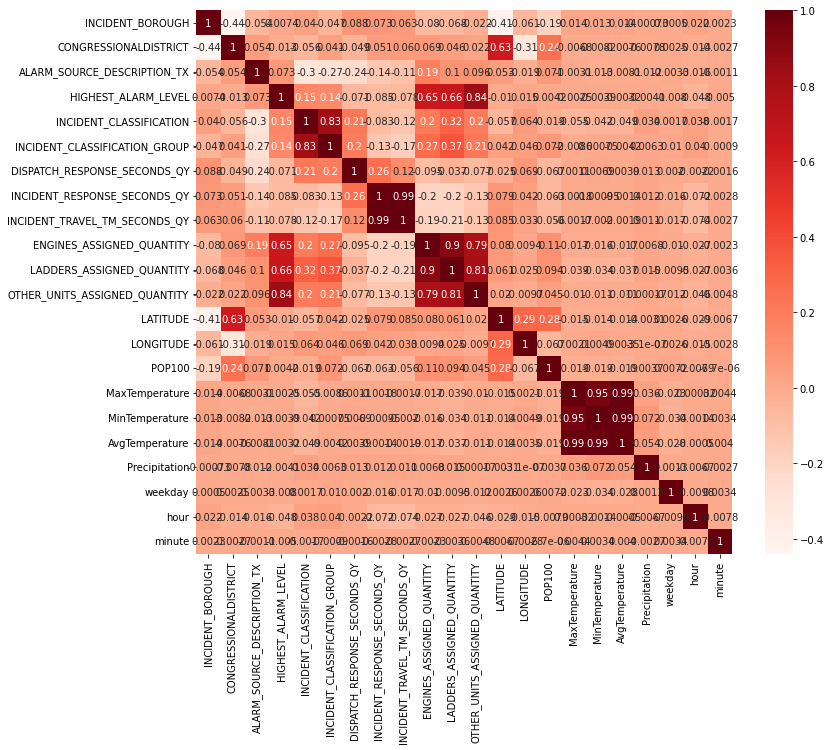

In [41]:
# check the correlation between features
plt.figure(figsize=(12,10))
cor = X2.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [42]:
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

In [43]:
# try CART (decision tree) to see the feature importance
model_CART = DecisionTreeRegressor()
model_CART.fit(X2, y)
importance_CART = model_CART.feature_importances_


CART Feature Importance:
Feature 0: INCIDENT_BOROUGH, Score: 0.00709
Feature 1: CONGRESSIONALDISTRICT, Score: 0.00384
Feature 2: ALARM_SOURCE_DESCRIPTION_TX, Score: 0.00211
Feature 3: HIGHEST_ALARM_LEVEL, Score: 0.03792
Feature 4: INCIDENT_CLASSIFICATION, Score: 0.01154
Feature 5: INCIDENT_CLASSIFICATION_GROUP, Score: 0.00079
Feature 6: DISPATCH_RESPONSE_SECONDS_QY, Score: 0.01909
Feature 7: INCIDENT_RESPONSE_SECONDS_QY, Score: 0.00781
Feature 8: INCIDENT_TRAVEL_TM_SECONDS_QY, Score: 0.01988
Feature 9: ENGINES_ASSIGNED_QUANTITY, Score: 0.43817
Feature 10: LADDERS_ASSIGNED_QUANTITY, Score: 0.00916
Feature 11: OTHER_UNITS_ASSIGNED_QUANTITY, Score: 0.20440
Feature 12: LATITUDE, Score: 0.06331
Feature 13: LONGITUDE, Score: 0.02882
Feature 14: POP100, Score: 0.08959
Feature 15: MaxTemperature, Score: 0.00951
Feature 16: MinTemperature, Score: 0.00630
Feature 17: AvgTemperature, Score: 0.00406
Feature 18: Precipitation, Score: 0.00733
Feature 19: weekday, Score: 0.00377
Feature 20: hour, Sco

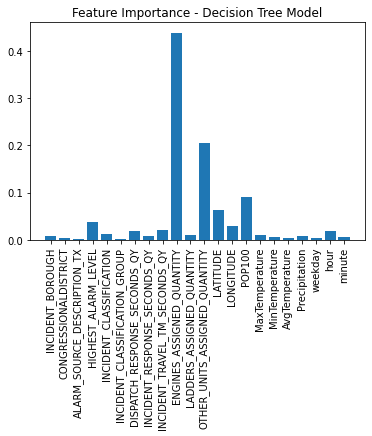

In [44]:
# summarize feature importance
print('CART Feature Importance:')
for i, (feature_name, importance_score) in enumerate(zip(X2.columns, importance_CART)):
    print(f'Feature {i}: {feature_name}, Score: {importance_score:.5f}')

# plot feature importance, descending
pyplot.bar(range(len(importance_CART)), importance_CART)
pyplot.xticks(range(len(importance_CART)), X2.columns, rotation='vertical')
pyplot.title('Feature Importance - Decision Tree Model')
pyplot.show()

In [45]:
# use random forest to calculate the feature importance
model_rf = RandomForestRegressor()
model_rf.fit(X2, y)
importance_rf = model_rf.feature_importances_

Random Forest Feature Importance:
Feature 0: INCIDENT_BOROUGH, Score: 0.00239
Feature 1: CONGRESSIONALDISTRICT, Score: 0.00521
Feature 2: ALARM_SOURCE_DESCRIPTION_TX, Score: 0.00438
Feature 3: HIGHEST_ALARM_LEVEL, Score: 0.02370
Feature 4: INCIDENT_CLASSIFICATION, Score: 0.02140
Feature 5: INCIDENT_CLASSIFICATION_GROUP, Score: 0.00105
Feature 6: DISPATCH_RESPONSE_SECONDS_QY, Score: 0.01491
Feature 7: INCIDENT_RESPONSE_SECONDS_QY, Score: 0.01894
Feature 8: INCIDENT_TRAVEL_TM_SECONDS_QY, Score: 0.02019
Feature 9: ENGINES_ASSIGNED_QUANTITY, Score: 0.47177
Feature 10: LADDERS_ASSIGNED_QUANTITY, Score: 0.01584
Feature 11: OTHER_UNITS_ASSIGNED_QUANTITY, Score: 0.15790
Feature 12: LATITUDE, Score: 0.07220
Feature 13: LONGITUDE, Score: 0.03404
Feature 14: POP100, Score: 0.02035
Feature 15: MaxTemperature, Score: 0.01123
Feature 16: MinTemperature, Score: 0.01960
Feature 17: AvgTemperature, Score: 0.01059
Feature 18: Precipitation, Score: 0.00738
Feature 19: weekday, Score: 0.01686
Feature 20: 

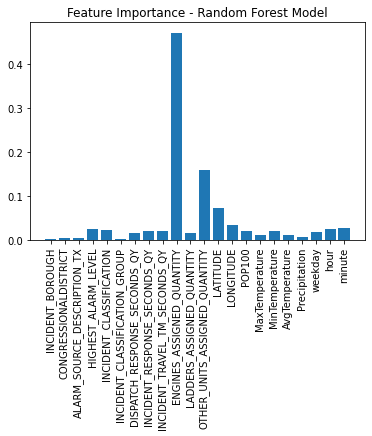

In [46]:
print('Random Forest Feature Importance:')
for i, (feature_name, importance_score) in enumerate(zip(X2.columns, importance_rf)):
    print(f'Feature {i}: {feature_name}, Score: {importance_score:.5f}')

# plot feature importance
pyplot.bar(range(len(importance_rf)), importance_rf)
pyplot.xticks(range(len(importance_rf)), X2.columns, rotation='vertical')
pyplot.title('Feature Importance - Random Forest Model')
pyplot.show()

In [47]:
# XGBoost
import xgboost
from xgboost import XGBRegressor
model_xgb = XGBRegressor()
model_xgb.fit(X2, y)
importance_xgb = model_xgb.feature_importances_

XGBoost Feature Importance:
Feature 0: INCIDENT_BOROUGH, Score: 0.00701
Feature 1: CONGRESSIONALDISTRICT, Score: 0.00867
Feature 2: ALARM_SOURCE_DESCRIPTION_TX, Score: 0.01525
Feature 3: HIGHEST_ALARM_LEVEL, Score: 0.12281
Feature 4: INCIDENT_CLASSIFICATION, Score: 0.01210
Feature 5: INCIDENT_CLASSIFICATION_GROUP, Score: 0.01334
Feature 6: DISPATCH_RESPONSE_SECONDS_QY, Score: 0.01122
Feature 7: INCIDENT_RESPONSE_SECONDS_QY, Score: 0.00889
Feature 8: INCIDENT_TRAVEL_TM_SECONDS_QY, Score: 0.02324
Feature 9: ENGINES_ASSIGNED_QUANTITY, Score: 0.37349
Feature 10: LADDERS_ASSIGNED_QUANTITY, Score: 0.03068
Feature 11: OTHER_UNITS_ASSIGNED_QUANTITY, Score: 0.11548
Feature 12: LATITUDE, Score: 0.04910
Feature 13: LONGITUDE, Score: 0.02415
Feature 14: POP100, Score: 0.00786
Feature 15: MaxTemperature, Score: 0.01324
Feature 16: MinTemperature, Score: 0.01178
Feature 17: AvgTemperature, Score: 0.00598
Feature 18: Precipitation, Score: 0.02133
Feature 19: weekday, Score: 0.07127
Feature 20: hour, 

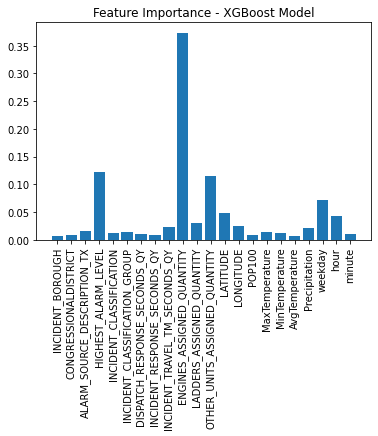

In [48]:
print('XGBoost Feature Importance:')
for i, (feature_name, importance_score) in enumerate(zip(X2.columns, importance_xgb)):
    print(f'Feature {i}: {feature_name}, Score: {importance_score:.5f}')

# plot feature importance
pyplot.bar(range(len(importance_xgb)), importance_xgb)
pyplot.xticks(range(len(importance_xgb)), X2.columns, rotation='vertical')
pyplot.title('Feature Importance - XGBoost Model')
pyplot.show()

#### 2. Use non-tree based models (Linear, Lasso) to get feature importance, with categorical features one-hot encoded

In [49]:
X3 = X.copy()

In [50]:
# but for highest alarm level, we still use ordinal values
X3['HIGHEST_ALARM_LEVEL'] = X3['HIGHEST_ALARM_LEVEL'].replace(alarm_level_mapping)
X3['HIGHEST_ALARM_LEVEL'] = X3['HIGHEST_ALARM_LEVEL'].astype(int)

In [51]:
# use OneHotEncoder for INCIDENT_BOROUGH, CONGRESSIONALDISTRICT, ALARM_SOURCE_DESCRIPTION_TX, INCIDENT_CLASSIFICATION, INCIDENT_CLASSIFICATION_GROUP
categorical_cols = ['INCIDENT_BOROUGH', 'CONGRESSIONALDISTRICT', 'ALARM_SOURCE_DESCRIPTION_TX', 'INCIDENT_CLASSIFICATION', 'INCIDENT_CLASSIFICATION_GROUP']

# Initialize OneHotEncoder
onehotencoder = preprocessing.OneHotEncoder()

X3_encoded = onehotencoder.fit_transform(X3[categorical_cols]).toarray()
X3_encoded = pd.DataFrame(X3_encoded, columns=onehotencoder.get_feature_names_out(categorical_cols))

X3.reset_index(drop=True, inplace=True)
X3_encoded.reset_index(drop=True, inplace=True)

X3 = pd.concat([X3, X3_encoded], axis=1)
X3 = X3.drop(categorical_cols, axis=1)

X3


,HIGHEST_ALARM_LEVEL,DISPATCH_RESPONSE_SECONDS_QY,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,ENGINES_ASSIGNED_QUANTITY,LADDERS_ASSIGNED_QUANTITY,OTHER_UNITS_ASSIGNED_QUANTITY,LATITUDE,LONGITUDE,POP100,MaxTemperature,MinTemperature,AvgTemperature,Precipitation,weekday,hour,minute,INCIDENT_BOROUGH_BRONX,INCIDENT_BOROUGH_BROOKLYN,INCIDENT_BOROUGH_MANHATTAN,INCIDENT_BOROUGH_QUEENS,INCIDENT_BOROUGH_RICHMOND / STATEN ISLAND,CONGRESSIONALDISTRICT_3.0,CONGRESSIONALDISTRICT_5.0,CONGRESSIONALDISTRICT_6.0,CONGRESSIONALDISTRICT_7.0,CONGRESSIONALDISTRICT_8.0,CONGRESSIONALDISTRICT_9.0,CONGRESSIONALDISTRICT_10.0,CONGRESSIONALDISTRICT_11.0,CONGRESSIONALDISTRICT_12.0,CONGRESSIONALDISTRICT_13.0,CONGRESSIONALDISTRICT_14.0,CONGRESSIONALDISTRICT_15.0,CONGRESSIONALDISTRICT_16.0,ALARM_SOURCE_DESCRIPTION_TX_911,ALARM_SOURCE_DESCRIPTION_TX_911 Text,ALARM_SOURCE_DESCRIPTION_TX_BARS,ALARM_SOURCE_DESCRIPTION_TX_CLASS-3,ALARM_SOURCE_DESCRIPTION_TX_EMS,ALARM_SOURCE_DESCRIPTION_TX_EMS Link/Medical,ALARM_SOURCE_DESCRIPTION_TX_EMS-911,ALARM_SOURCE_DESCRIPTION_TX_ERS,ALARM_SOURCE_DESCRIPTION_TX_ERS No Contact,ALARM_SOURCE_DESCRIPTION_TX_PD Link/Medical,ALARM_SOURCE_DESCRIPTION_TX_PHONE,ALARM_SOURCE_DESCRIPTION_TX_Private Fire Alarm,ALARM_SOURCE_DESCRIPTION_TX_SOL,ALARM_SOURCE_DESCRIPTION_TX_VERBAL,INCIDENT_CLASSIFICATION_Abandoned Derelict Vehicle Fire,INCIDENT_CLASSIFICATION_Automobile Fire,INCIDENT_CLASSIFICATION_Brush Fire,INCIDENT_CLASSIFICATION_Church Fire,INCIDENT_CLASSIFICATION_Construction or Demolition Building Fire,INCIDENT_CLASSIFICATION_Demolition Debris or Rubbish Fire,INCIDENT_CLASSIFICATION_Factory Fire,INCIDENT_CLASSIFICATION_Hospital Fire,INCIDENT_CLASSIFICATION_Manhole Fire - Blown Cover,INCIDENT_CLASSIFICATION_Manhole Fire - Extended to Building,INCIDENT_CLASSIFICATION_Manhole Fire - Other,INCIDENT_CLASSIFICATION_Manhole Fire - Seeping Smoke,INCIDENT_CLASSIFICATION_Maritime Fire,INCIDENT_CLASSIFICATION_Multiple Dwelling 'A' - Compactor fire,INCIDENT_CLASSIFICATION_Multiple Dwelling 'A' - Food on the stove fire,INCIDENT_CLASSIFICATION_Multiple Dwelling 'A' - Other fire,INCIDENT_CLASSIFICATION_Multiple Dwelling 'B' Fire,INCIDENT_CLASSIFICATION_Other Commercial Building Fire,INCIDENT_CLASSIFICATION_Other Public Building Fire,INCIDENT_CLASSIFICATION_Other Transportation Fire,INCIDENT_CLASSIFICATION_Private Dwelling Fire,INCIDENT_CLASSIFICATION_School Fire,INCIDENT_CLASSIFICATION_Store Fire,INCIDENT_CLASSIFICATION_Theater or TV Studio Fire,INCIDENT_CLASSIFICATION_Transit System - NonStructural,INCIDENT_CLASSIFICATION_Transit System - Structural,INCIDENT_CLASSIFICATION_Undefined Nonstructural Fire,INCIDENT_CLASSIFICATION_Under Contruction / Vacant Fire,INCIDENT_CLASSIFICATION_Untenanted Building Fire,INCIDENT_CLASSIFICATION_GROUP_NonStructural Fires,INCIDENT_CLASSIFICATION_GROUP_Structural Fires
0,1,32.0,0.0,0.0,1.0,0.0,0.0,40.729553,-73.989900,215.929626,83,67,75.0,0.000,0,20,53,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,38.0,225.0,187.0,1.0,1.0,0.0,40.729553,-73.989900,215.929626,88,71,79.5,0.000,5,4,22,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,24.0,173.0,149.0,3.0,2.0,1.0,40.729553,-73.989900,215.929626,68,64,66.0,0.000,3,21,39,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,37.0,122.0,85.0,4.0,2.0,1.0,40.729553,-73.989900,215.929626,33,21,27.0,0.000,4,22,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [52]:
# first try linear regression to see feature importance
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(X3, y)
importance_lr = model_lr.coef_


Linear Regression Feature Importance - top 30:
Feature 0: INCIDENT_CLASSIFICATION_Under Contruction / Vacant Fire, Score: 7240.69338
Feature 1: LONGITUDE, Score: -2873.71453
Feature 2: INCIDENT_CLASSIFICATION_Multiple Dwelling 'B' Fire, Score: -2176.67498
Feature 3: HIGHEST_ALARM_LEVEL, Score: 2134.80566
Feature 4: INCIDENT_CLASSIFICATION_Hospital Fire, Score: -2024.88642
Feature 5: INCIDENT_CLASSIFICATION_School Fire, Score: -1882.41085
Feature 6: INCIDENT_CLASSIFICATION_Church Fire, Score: -1829.52351
Feature 7: INCIDENT_CLASSIFICATION_Construction or Demolition Building Fire, Score: -1728.24771
Feature 8: INCIDENT_CLASSIFICATION_Transit System - Structural, Score: 1718.51893
Feature 9: ALARM_SOURCE_DESCRIPTION_TX_911, Score: 1533.29499
Feature 10: ENGINES_ASSIGNED_QUANTITY, Score: 1491.68563
Feature 11: INCIDENT_CLASSIFICATION_Theater or TV Studio Fire, Score: -1463.92037
Feature 12: INCIDENT_CLASSIFICATION_Factory Fire, Score: 1441.19529
Feature 13: INCIDENT_CLASSIFICATION_Other Tr

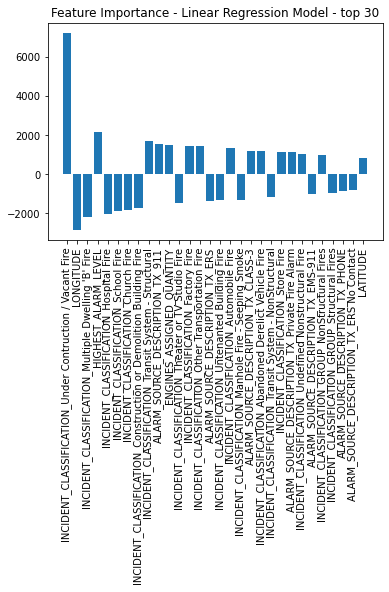

In [53]:
# feature importance, only show the top 30 features
print('Linear Regression Feature Importance - top 30:')
importance_lr_abs = np.abs(importance_lr)
importance_lr_idx = np.argsort(importance_lr_abs)[::-1]
for i in range(30):
    print(f'Feature {i}: {X3.columns[importance_lr_idx[i]]}, Score: {importance_lr[importance_lr_idx[i]]:.5f}')

# plot feature importance
pyplot.bar(range(30), importance_lr[importance_lr_idx[:30]])
pyplot.xticks(range(30), X3.columns[importance_lr_idx[:30]], rotation='vertical')
pyplot.title('Feature Importance - Linear Regression Model - top 30')
pyplot.show()

In [54]:
# use Lasso to see feature importance
from sklearn.linear_model import Lasso
model_lasso = Lasso(alpha=0.1)
model_lasso.fit(X3, y)
importance_lasso = model_lasso.coef_


Lasso Feature Importance - top 30:
Feature 0: INCIDENT_CLASSIFICATION_Under Contruction / Vacant Fire, Score: 7208.10272
Feature 1: LONGITUDE, Score: -2629.77353
Feature 2: HIGHEST_ALARM_LEVEL, Score: 2134.58073
Feature 3: INCIDENT_CLASSIFICATION_Multiple Dwelling 'B' Fire, Score: -2122.02009
Feature 4: INCIDENT_CLASSIFICATION_Hospital Fire, Score: -1955.46606
Feature 5: INCIDENT_CLASSIFICATION_School Fire, Score: -1819.57055
Feature 6: INCIDENT_CLASSIFICATION_GROUP_NonStructural Fires, Score: 1744.96413
Feature 7: INCIDENT_CLASSIFICATION_Church Fire, Score: -1742.48208
Feature 8: INCIDENT_CLASSIFICATION_Other Transportation Fire, Score: 1674.50819
Feature 9: INCIDENT_CLASSIFICATION_Automobile Fire, Score: 1591.27569
Feature 10: ENGINES_ASSIGNED_QUANTITY, Score: 1489.31268
Feature 11: ALARM_SOURCE_DESCRIPTION_TX_ERS, Score: -1415.84749
Feature 12: INCIDENT_CLASSIFICATION_Construction or Demolition Building Fire, Score: -1397.09037
Feature 13: INCIDENT_CLASSIFICATION_Abandoned Derelict 

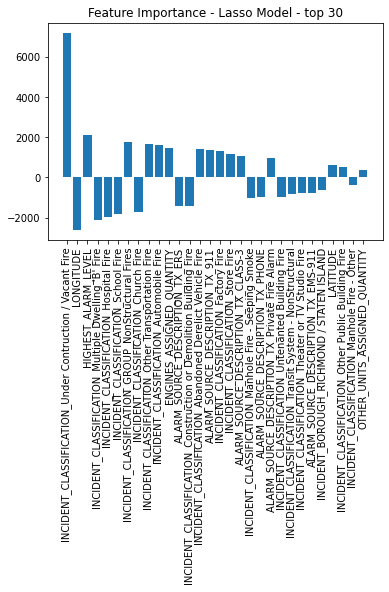

In [55]:
# feature importance, only show the top 30 features
print('Lasso Feature Importance - top 30:')
importance_lasso_abs = np.abs(importance_lasso)
importance_lasso_idx = np.argsort(importance_lasso_abs)[::-1]
for i in range(30):
    print(f'Feature {i}: {X3.columns[importance_lasso_idx[i]]}, Score: {importance_lasso[importance_lasso_idx[i]]:.5f}')

# plot feature importance
pyplot.bar(range(30), importance_lasso[importance_lasso_idx[:30]])
pyplot.xticks(range(30), X3.columns[importance_lasso_idx[:30]], rotation='vertical')
pyplot.title('Feature Importance - Lasso Model - top 30')
pyplot.show()

#### Use PCA to reduce dimensionality, then do the prediction

In [56]:
# there are 80 columns, we can use PCA to reduce the dimensionality

# first scale the data
scaler = preprocessing.StandardScaler()
X3_scaled = scaler.fit_transform(X3)


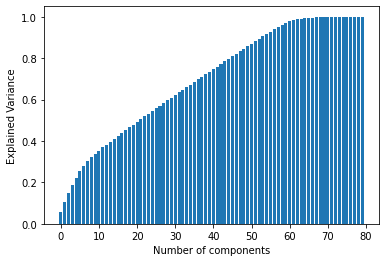

In [57]:
# see the explained variance ratio
pca = PCA(X3_scaled.shape[1])
X3_pca = pca.fit_transform(X3_scaled)
eigenvalues = pca.explained_variance_ratio_

n = 80
plt.bar(np.arange(n), eigenvalues[:n].cumsum())
plt.xlabel("Number of components")
plt.ylabel("Explained Variance")
plt.show()

In [58]:
P = PCA(n_components=0.8)

X3_P = P.fit_transform(X3_scaled)

print('Original number of features:', X3_scaled.shape[1])
print('Reduced number of features:', X3_P.shape[1])

Original number of features: 80
Reduced number of features: 46


In [61]:
# try linear regression to do the prediction
X_train, X_test, y_train, y_test = train_test_split(X3_P, y, test_size=0.2, random_state=123)



In [62]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

r2_lr = r2_score(y_test, y_pred_lr)
print('R2 of Linear Regression Prediction:', r2_lr)

R2 of Linear Regression Prediction: 0.5245217885201979


In [64]:
# try tree
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

r2_tree = r2_score(y_test, y_pred_tree)
print('R2 of Decision Tree Prediction:', r2_tree)

R2 of Decision Tree Prediction: -0.07201866732321349
